In [2]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn2
from pyteomics import mass, parser
tqdm.pandas()

# Deamidated

In [3]:
ionbot = pd.read_csv("/home/robbe/ionbot/Voor_vergelijking_OSE/From_scratch/ionbotvcomet.tsv", sep="\t")
ionbot.columns
ionbot = ionbot.filter(["Spectrum File", "Scan", "precursor_mass", "ionbot Sequence","ionbot_mods_formatted", "Comet Raw Sequence", "comet_mods_formatted", "ionbot_seq_eval", "ionbot_mods_eval", "ionbot peptide mass", "comet peptide mass", "ionbot PEP", "Comet PEP", "Fragger PEP", "pFind q-value"])
ionbot["spectrumID"] = ionbot["Spectrum File"] + ionbot["Scan"].astype(str)

In [4]:
Fragger = pd.read_csv("fraggervcomet.tsv", sep="\t")
Fragger.columns
Fragger = Fragger.filter(["Spectrum File", "Scan", "precursor_mass", "Fragger Sequence","fragger_mods_formatted", "Comet Raw Sequence", "comet_mods_formatted", "fragger_seq_eval", "fragger_mods_eval", "MSFragger Peptide Mass", "comet peptide mass", "Comet PEP", "Fragger PEP"])
Fragger["spectrumID"] = Fragger["Spectrum File"] + Fragger["Scan"].astype(str)

In [5]:
pfind = pd.read_csv("pfindvcomet.tsv", sep="\t")
pfind.columns
pfind = pfind.filter(["Spectrum File", "Scan", "precursor_mass", "pFind Sequence","pfind_mods_formatted", "Comet Raw Sequence", "comet_mods_formatted", "pfind_seq_eval", "pfind_mods_eval", "pFind Peptide Mass", "comet peptide mass", "pFind q-value"])
pfind["spectrumID"] = pfind["Spectrum File"] + pfind["Scan"].astype(str)

In [6]:
ionbotnewlydeamidated = ionbot[(ionbot["ionbot_seq_eval"] == True) & (ionbot["ionbot_mods_eval"] == "Newly modified")]

In [7]:
ionbotnewlydeamidated = ionbotnewlydeamidated[ionbotnewlydeamidated["ionbot_mods_formatted"] == "['deamidated']"]

In [8]:
ionbotnd = set(ionbotnewlydeamidated["spectrumID"].to_list())

In [9]:
Fraggernewlydeamidated = Fragger[(Fragger["fragger_seq_eval"] == True) & (Fragger["fragger_mods_eval"] == "Newly modified")]

In [10]:
Fraggernewlydeamidated = Fraggernewlydeamidated[Fraggernewlydeamidated["fragger_mods_formatted"] == "['deamidated']"]

In [11]:
Fraggernd = set(Fraggernewlydeamidated["spectrumID"].to_list())

In [12]:
pfindnewlydeamidated = pfind[(pfind["pfind_seq_eval"] == True) & (pfind["pfind_mods_eval"] == "Newly modified")]

In [13]:
pfindnewlydeamidated = pfindnewlydeamidated[pfindnewlydeamidated["pfind_mods_formatted"] == "['deamidated']"]

In [14]:
pfindnd = set(pfindnewlydeamidated["spectrumID"].to_list())

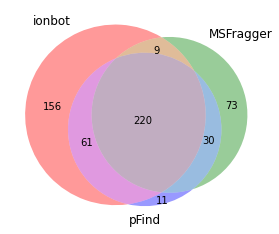

In [15]:
venn3(subsets=[ionbotnd, Fraggernd, pfindnd], set_labels=('ionbot', 'MSFragger', 'pFind'))

# Propionamide

In [17]:
ionbotprop = set(ionbot[(ionbot["comet_mods_formatted"] == "['carbamidomethyl', 'methyl']") & (ionbot["ionbot_mods_formatted"] == "['propionamide']")]["spectrumID"].to_list())

In [18]:
pfindprop = set(pfind[(pfind["comet_mods_formatted"] == "['carbamidomethyl', 'methyl']") & (pfind["pfind_mods_formatted"] == "['propionamide']")]["spectrumID"].to_list())

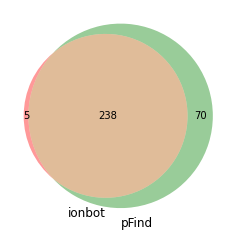

In [19]:
venn2(subsets=[ionbotprop, pfindprop], set_labels=("ionbot","pFind"))